<a href="https://colab.research.google.com/github/Zzmirror/Machine-learning-Basic-projects/blob/main/Regression/Mobile_Price_Classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dataset

In [34]:
import pandas as pd

df = pd.read_csv("/content/mobile_prices.csv")

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [44]:
print(f"we have these classes : {df['price_range'].unique()}")
print("-------------------------")
print(f"we have these features : {df.columns[:-1]}")

print("-------------------------")


print("number of samples in class 0  :" ,df['price_range'].value_counts()[0])
print("number of samples in class 1  :" ,df['price_range'].value_counts()[1])
print("number of samples in class 2  :" ,df['price_range'].value_counts()[2])
print("number of samples in class 3  :" ,df['price_range'].value_counts()[3])



we have these classes : [1 2 3 0]
-------------------------
we have these features : Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
-------------------------
number of samples in class 0  : 500
number of samples in class 1  : 500
number of samples in class 2  : 500
number of samples in class 3  : 500


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.iloc[: , :-1].values
X_noraml = StandardScaler().fit_transform(X)
y = df.iloc[: , -1].values

x_train , x_test , y_train , y_test = train_test_split(X_noraml , y , test_size=0.20 , random_state=0)

print("General dataset :")
print(f"type x: {type(X_noraml)} , shape x : {X_noraml.shape}")
print(f"type y: {type(y)} , shape y : {y.shape}")

print("-------------------------")

print("Train data :")
print(f"x_train type: {type(x_train)} , shape  : {x_train.shape}")
print(f"y_train type: {type(y_train)} , shape  : {y_train.shape}")

print("-------------------------")
print("Test data : ")
print(f"x_test type: {type(x_test)} ,  shape : {x_test.shape}")
print(f"y_test type: {type(y_test)} , shape y : {y_test.shape}")

General dataset :
type x: <class 'numpy.ndarray'> , shape x : (2000, 20)
type y: <class 'numpy.ndarray'> , shape y : (2000,)
-------------------------
Train data :
x_train type: <class 'numpy.ndarray'> , shape  : (1600, 20)
y_train type: <class 'numpy.ndarray'> , shape  : (1600,)
-------------------------
Test data : 
x_test type: <class 'numpy.ndarray'> ,  shape : (400, 20)
y_test type: <class 'numpy.ndarray'> , shape y : (400,)




## visualize data based on some features :



In [13]:
import matplotlib.pyplot as plt


def ploting_data(X , y , feature_1 , feature_2):
  low = y == 0
  medium  = y == 1
  high = y == 2
  very_high = y ==3
  index_no_1 = df.columns.get_loc(feature_1)
  index_no_2 = df.columns.get_loc(feature_2)



  plt.plot(X[low , index_no_1] , X[low , index_no_2] , 'g+', label='low')
  plt.plot(X[medium , index_no_1] , X[medium , index_no_2] , 'b+' , label='medium')
  plt.plot(X[high , index_no_1] , X[high , index_no_2] , 'y+' , label='high')
  plt.plot(X[very_high , index_no_1] , X[very_high , index_no_2] , 'r+' , label='very high')
  plt.xlabel(feature_1)
  plt.ylabel(feature_2)
  plt.legend(loc = 'upper right')


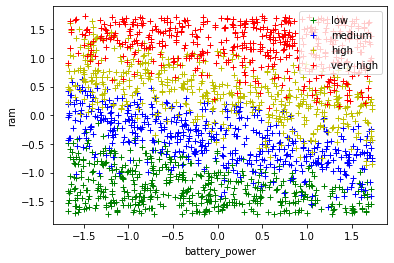

In [39]:
ploting_data(X_noraml , y , 'battery_power' , 'ram')

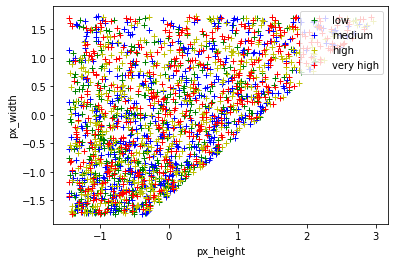

In [40]:
ploting_data(X_noraml , y , 'px_height',	'px_width' )

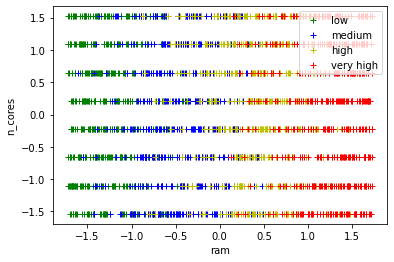

In [41]:
ploting_data(X_noraml , y , 'ram',	'n_cores' )

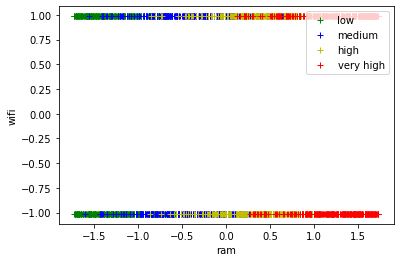

In [42]:
ploting_data(X_noraml , y , 'ram' ,	'wifi' )

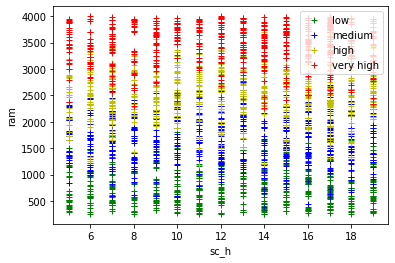

In [43]:
ploting_data(X , y , 'sc_h', 'ram' )

# Defining Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  95.5
